In [51]:
import numpy as np

import imageio
import cv2 as openCV
from PIL import Image, ImageOps

import matplotlib.pyplot as plt

In [52]:
PIG_IMG = imageio.imread('./PIG_MR')
METADATA = PIG_IMG.meta

PLT_NAME_id = METADATA.PatientID

pxl = METADATA.Columns - 1

pxlData = np.array([px for px in range(256)])

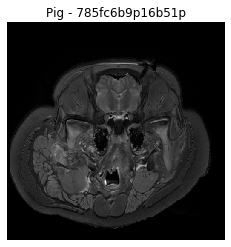

In [53]:
plt.imshow(PIG_IMG, cmap = 'gray')
plt.title('Pig - '+ PLT_NAME_id)
plt.axis('off')
plt.show()

In [63]:
pixelValues, grayLevels = np.histogram(PIG_IMG.ravel(), range(pxl))

# print(np.shape(pixelValues)) retorna um vetor

maxIntensidade = np.max(pixelValues)
minIntensidade = np.min(pixelValues)

print('max intensidade: %.0f' % maxIntensidade)
print('min intensidade: %.0f' % minIntensidade)

max intensidade: 58268
min intensidade: 0


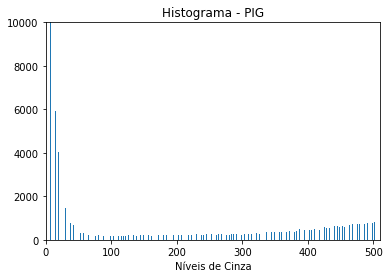

In [64]:
plt.bar(grayLevels[:-1], pixelValues, width=1, edgecolor='none')
plt.title('Histograma - PIG')
plt.xlabel('Níveis de Cinza')
plt.xlim([-0.5, pxl])
plt.ylim([0, 10000])
plt.show()

In [57]:
## SIGMOID
def sigmoid(data, omega, sigma):
    pxl = len(data)
    sig = np.zeros(pxl)
    for i in range(pxl):
        facSigmoid = np.exp(- ( (data[i] - omega) /sigma ) )
        sig[i] = pxl * (1/(1 + facSigmoid))
    return sig

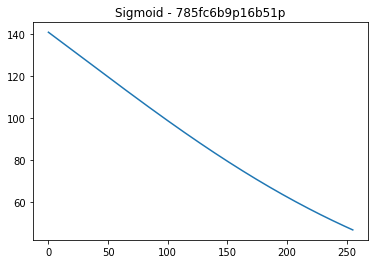

In [62]:
sigmoidPig = sigmoid(pxlData, 30, -150)

plt.plot(pxlData, sigmoidPig)
plt.title('Sigmoid - '+ PLT_NAME_id)
plt.show()

In [22]:
## TRANSFORM. NEGATIVO
imgInvert = pxl - 1 - PIG_IMG

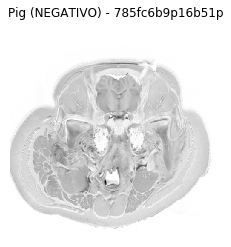

In [21]:
plt.imshow(imgInvert, cmap = 'gray')
plt.title('Pig (NEGATIVO) - '+ PLT_NAME_id)
plt.axis('off')
plt.show()

In [32]:
## TRANSFORM. NEGATIVO LOG

'''
log transform
-> s = c*log(1+r)

-> c = (L-1)/log(1+|I_max|)
'''
def logTransform(pixels, grayScale):
    maxGray = np.max(grayScale)
    return (pixels/np.log(1+ maxGray))*np.log(1+grayScale)

imgLogTransfor = logTransform(pxl, PIG_IMG)

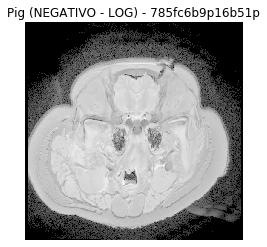

In [33]:
plt.imshow(imgLogTransfor, cmap = 'gray')
plt.title('Pig (NEGATIVO - LOG) - '+ PLT_NAME_id)
plt.axis('off')
plt.show()

In [42]:
## CORRECAO GAMMA

gamma = 1.5  # Se gamma < 1 ~ Dark ; Se gamma > 1 ~ Bright

gamma_correction=((PIG_IMG/pxl)**(1/gamma))

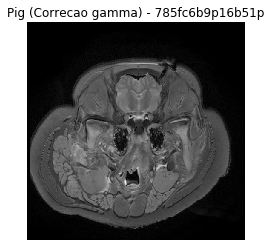

In [44]:
plt.imshow(gamma_correction, cmap = 'gray')
plt.title('Pig (Correcao gamma) - '+ PLT_NAME_id)
plt.axis('off')
plt.show()